In [ ]:
# Step 1 - Importing Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')  # better aesthetics
%matplotlib inline

In [ ]:
#Step 2 - Loading the Dataset
data = pd.read_csv('C:/Users/USER/OneDrive/Desktop/AI,ML INTERNSHIP/Titanic-Dataset.csv', index_col=0)#V
data.head(893)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
# Step 3 -  Basic Information of the dataset 
print("Shape Of dataset:",data.shape) #Also check the number of rows and columns:

Shape Of dataset: (891, 11)


In [8]:
data.info() #Check the data types and non-null values in each column

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
# Step 4 - Statistical Summary of the dataset
data.describe(include= 'all') #Get a statistical summary of the dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Step 5 - Check for Missing Values
data.isnull().sum() #Check for missing values in each column


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Text(0.5, 1.0, 'Missing Values Heatmap')

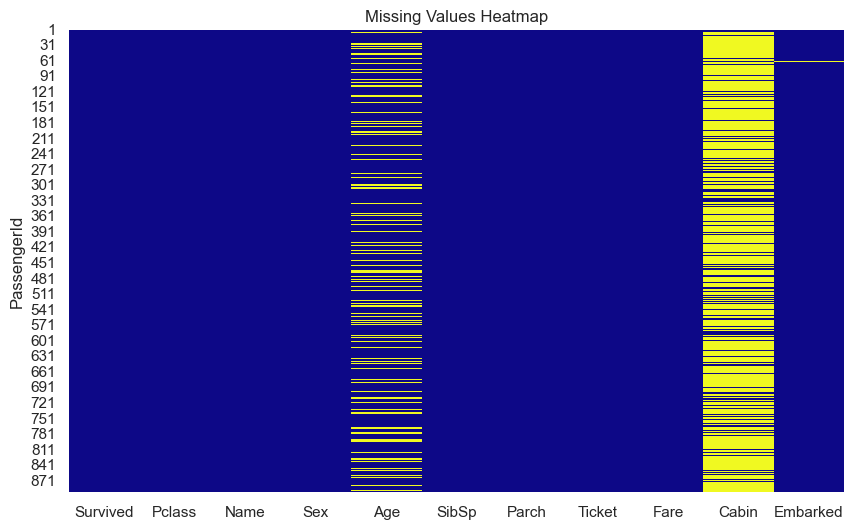

In [33]:
# Optional: Visual heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
plt.title("Missing Values Heatmap")

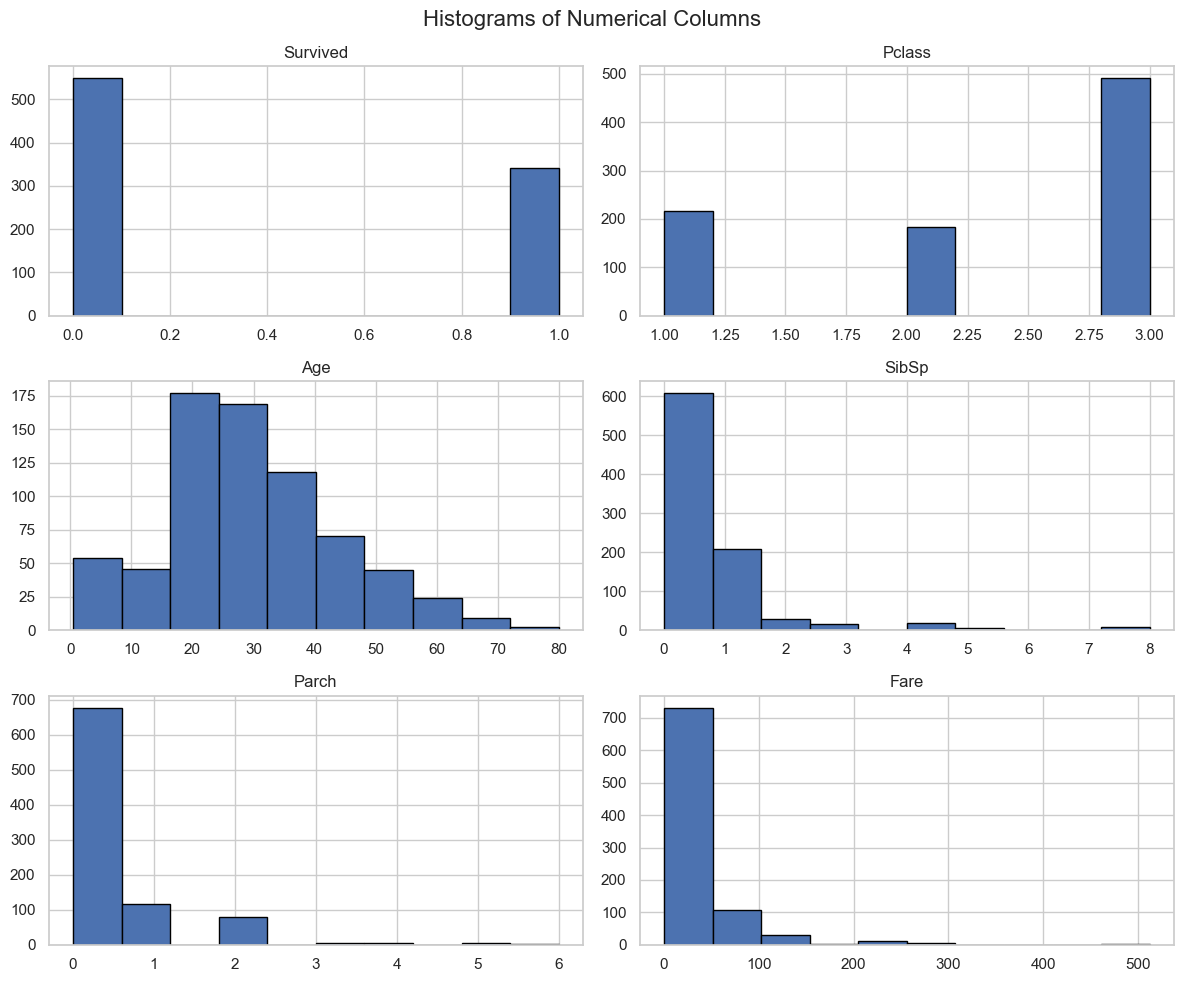

In [ ]:
# Step 6 - Histogram of numerical columns:
data.hist(figsize=(12, 10),  edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of Fare')

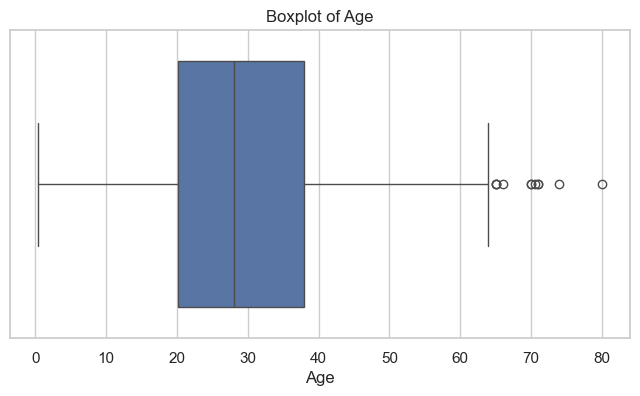

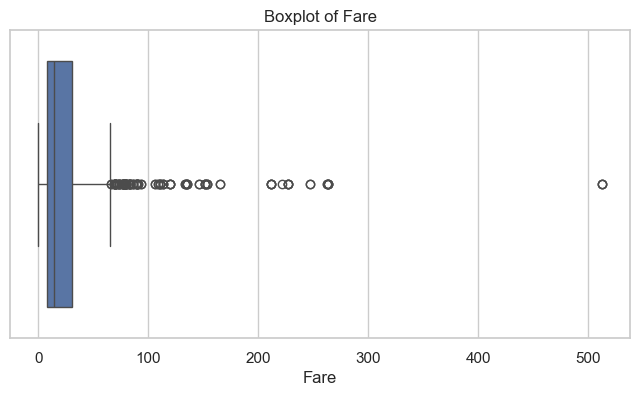

In [36]:
#  Step 7 - Iam using Boxplots to detect outliers:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Age'])
plt.title("Boxplot of Age")

plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Fare'])
plt.title("Boxplot of Fare")

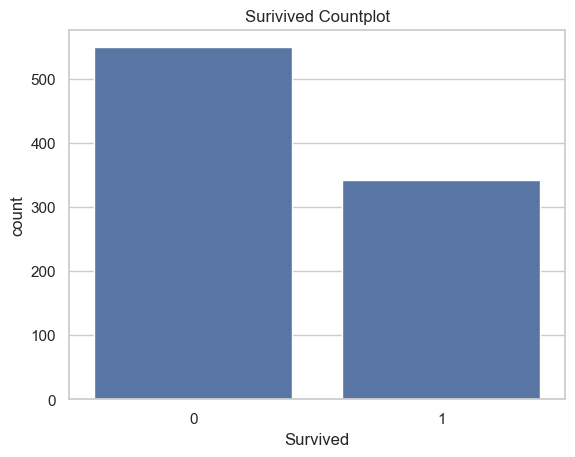

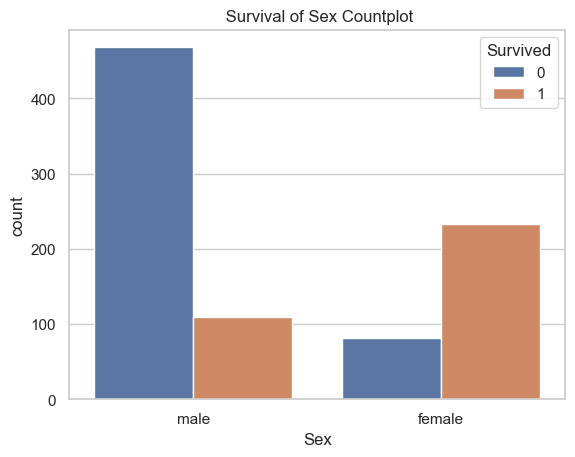

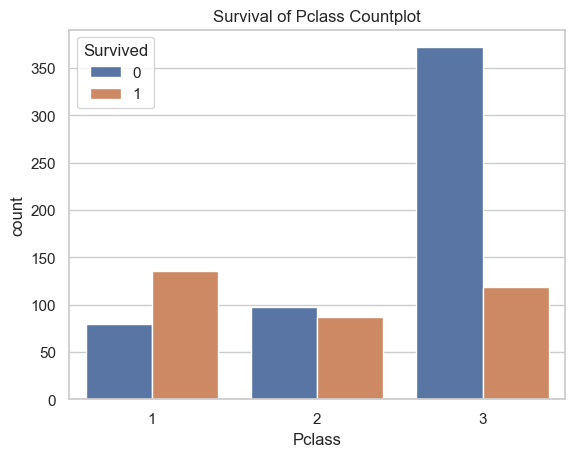

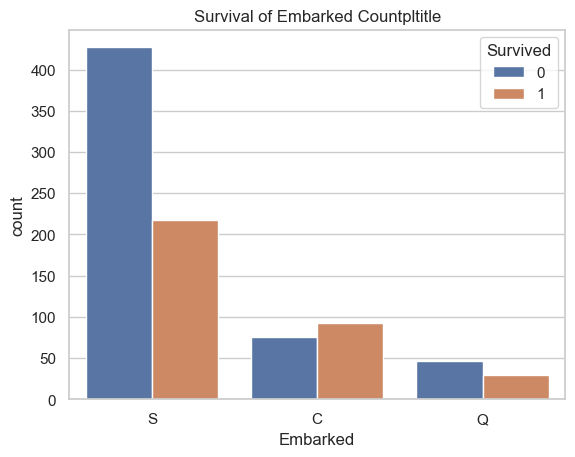

In [39]:
# Step 8 - Countplot of categorical columns:
sns.countplot(x='Survived', data=data)
plt.title("Surivived Countplot")
plt.show()
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title(" Survival of Sex Countplot")
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title("Survival of Pclass Countplot")
plt.show()
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title("Survival of Embarked Countpltitle")
plt.show()

In [ ]:
#Step 9: Correlation & Pair Plots
data.select_dtypes(include=['number']).columns



Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

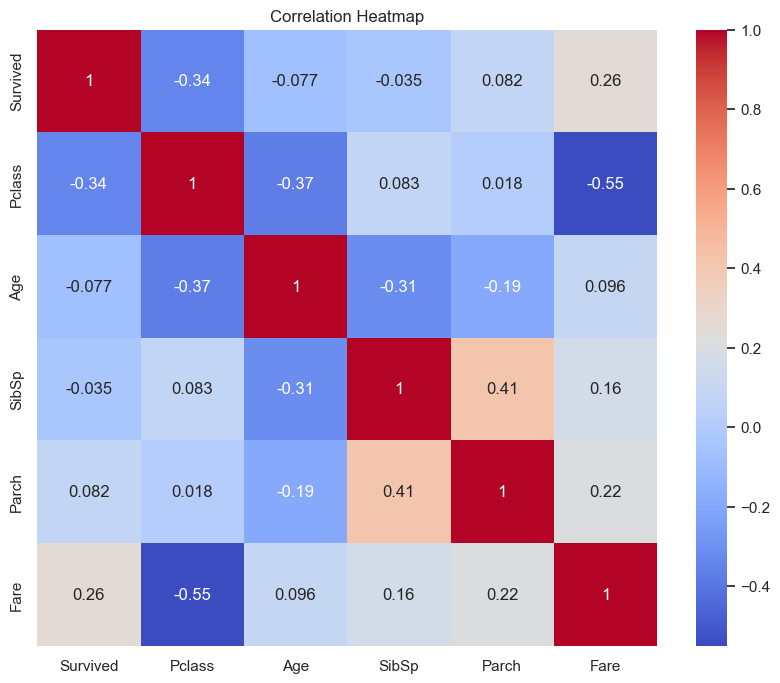

In [ ]:
# only select useful numeric columns for correlation
numeric_data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

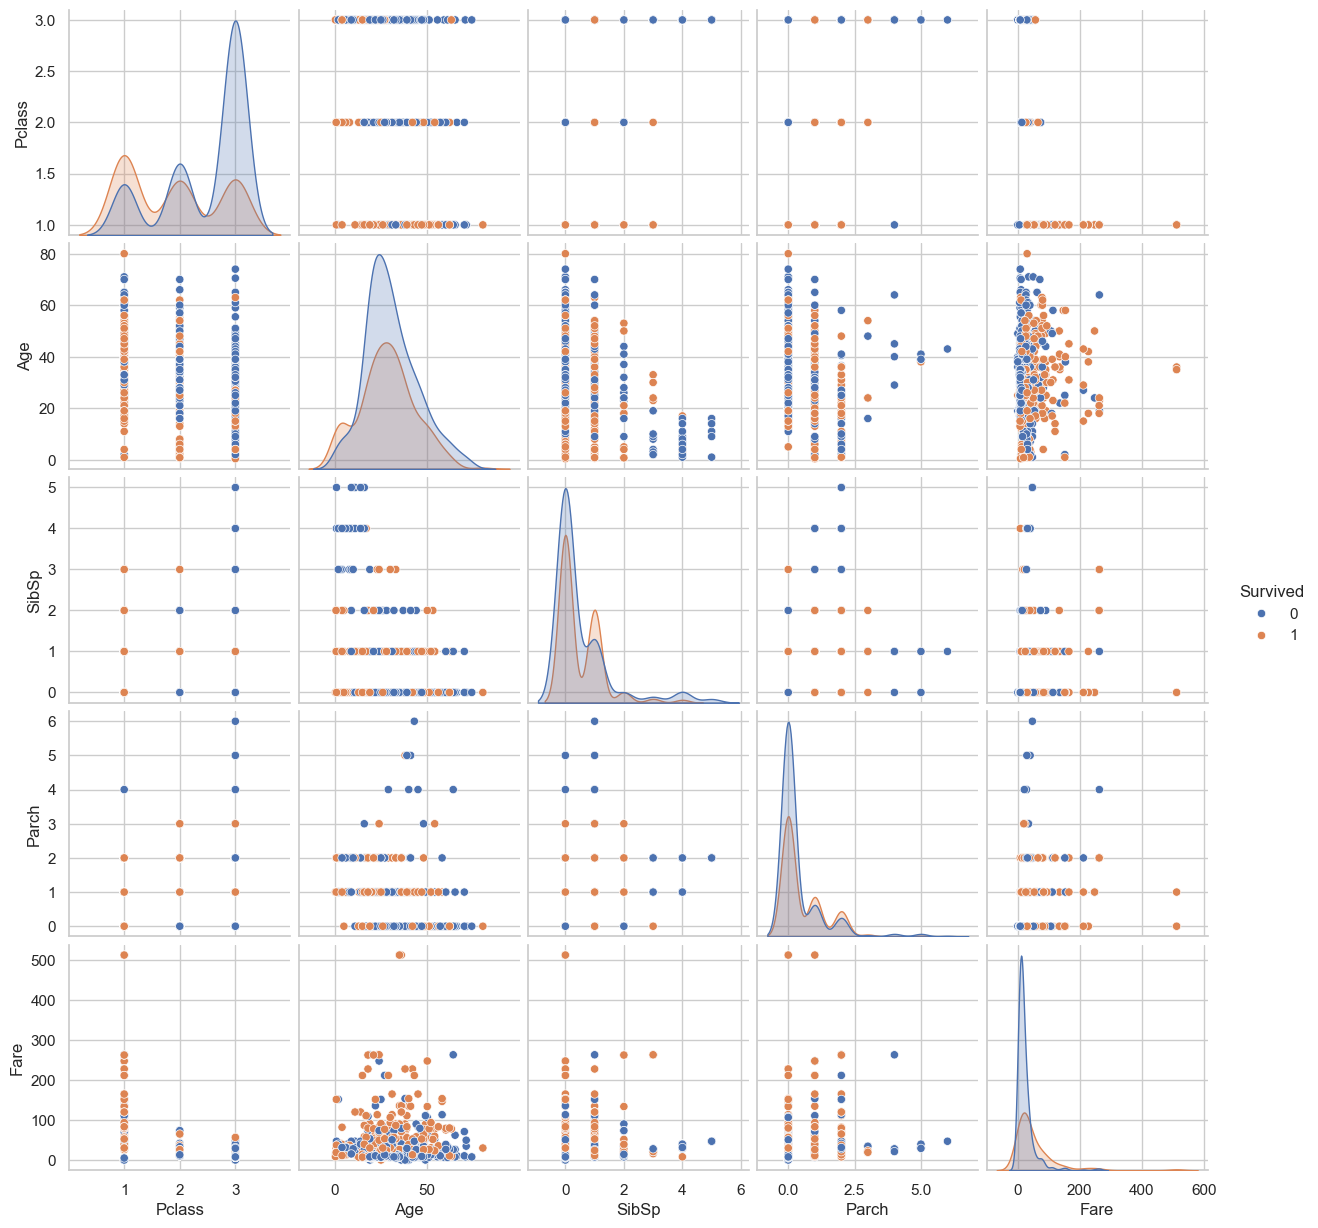

In [ ]:
# Step 10: Pair Plots
sns.pairplot(numeric_data.dropna(), hue='Survived')
plt.show()

In [44]:
# 📌 Step 11: Save Cleaned Data (optional)
data.to_csv("titanic_cleaned.csv", index=False)

In [ ]:
# 📌 Step 11: Observations (write in markdown or as comments)
# Example:

"""
🔍 Key Insights:
- Females had much higher survival rate than males.
- Passengers in Pclass 1 had better survival odds.
- Higher fare was positively correlated with survival.
- Children (lower Age) had relatively better survival.
- Embarked and Fare distributions show patterns worth exploring further.
"""